In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv


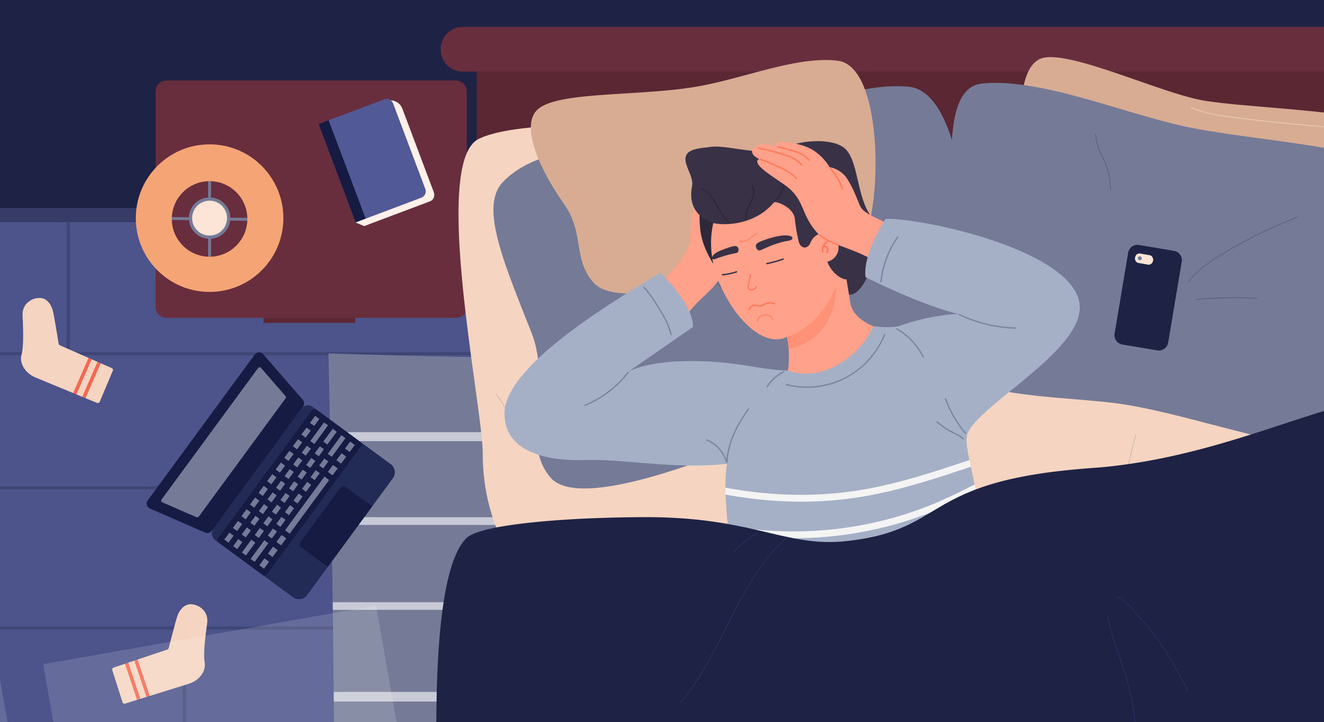


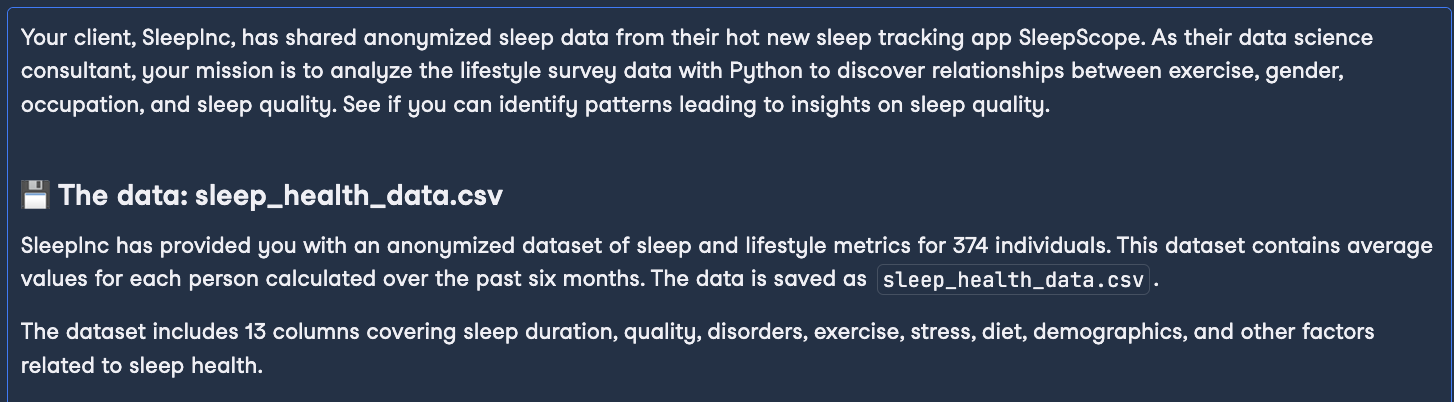
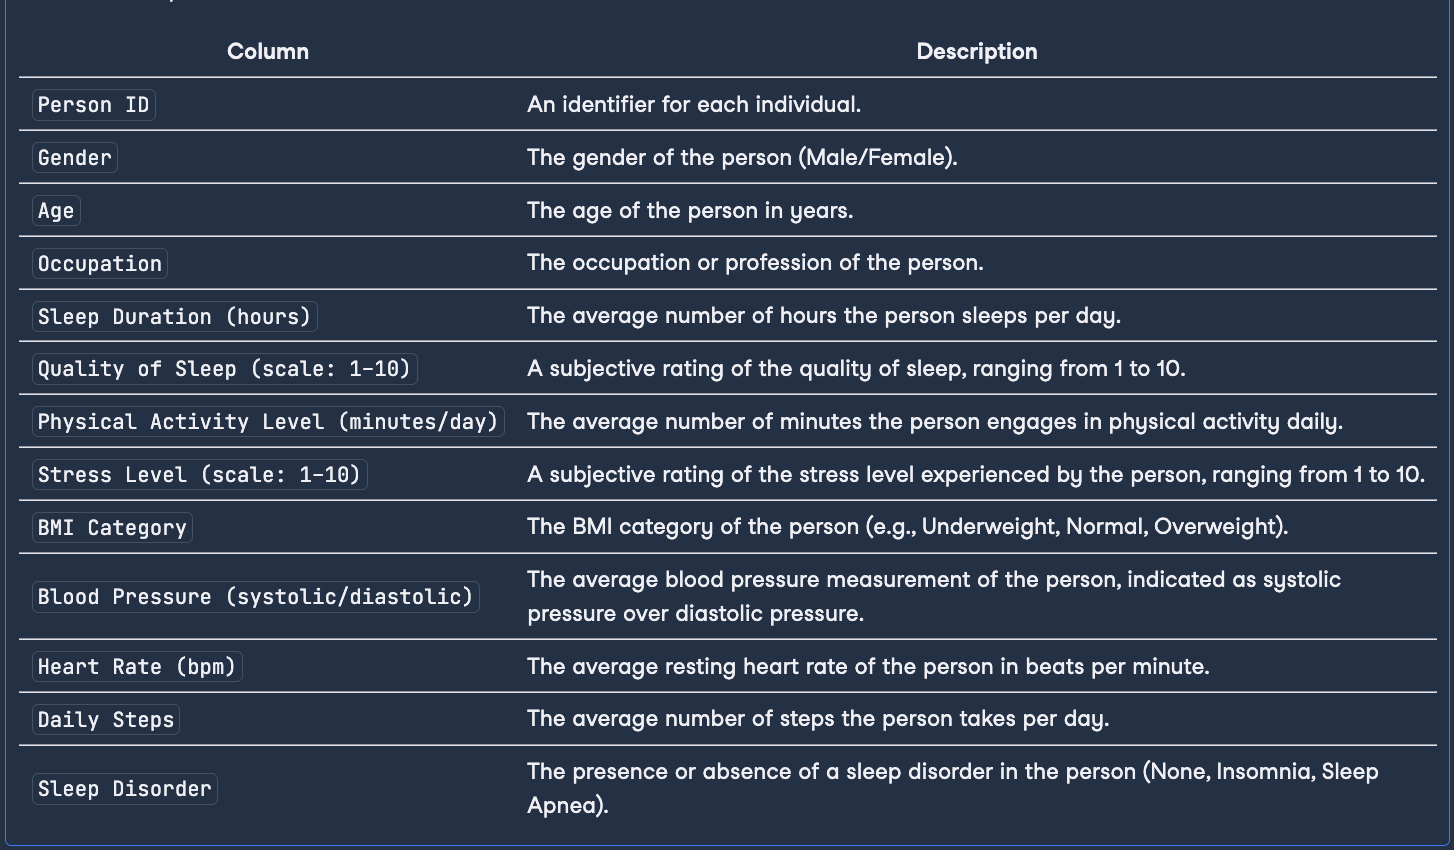

In [2]:
data = pd.read_csv("/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv")
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
data.groupby('Occupation')[['Sleep Duration','Quality of Sleep']].max()

,Sleep Duration,Quality of Sleep
Occupation,,
Accountant,8.0,9
Doctor,8.2,9
Engineer,8.5,9
Lawyer,7.9,8
Manager,6.9,7
Nurse,8.2,9
Sales Representative,5.9,4
Salesperson,6.5,6
Scientist,6.2,6


In [4]:
data.groupby('Occupation')[['Sleep Duration','Quality of Sleep']].min()

,Sleep Duration,Quality of Sleep
Occupation,,
Accountant,6.5,7
Doctor,6.0,6
Engineer,6.5,5
Lawyer,6.9,7
Manager,6.9,7
Nurse,5.9,5
Sales Representative,5.9,4
Salesperson,6.3,6
Scientist,5.8,4


In [5]:
data.groupby('Occupation')[['Sleep Duration','Quality of Sleep']].mean()

,Sleep Duration,Quality of Sleep
Occupation,,
Accountant,7.113514,7.891892
Doctor,6.970423,6.647887
Engineer,7.987302,8.412698
Lawyer,7.410638,7.893617
Manager,6.900000,7.000000
Nurse,7.063014,7.369863
Sales Representative,5.900000,4.000000
Salesperson,6.403125,6.000000
Scientist,6.000000,5.000000


1.Which occupation has the lowest average sleep duration? Save this in a string variable called lowest_sleep_occ ?

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Which occupation has the lowest average sleep duration?
lowest_sleep_occ = data.groupby("Occupation")['Sleep Duration'].agg("mean").sort_values().index[0]


2.Which occupation has the lowest average sleep quality?

In [7]:
lowest_sleep_quality_occ = data.groupby("Occupation")['Quality of Sleep'].agg("mean").sort_values().index[0]


3.Did the occupation with the lowest sleep duration also have the lowest sleep quality?

In [8]:
if lowest_sleep_occ == lowest_sleep_quality_occ:
    same_occ = True
else:
    same_occ = False
print(same_occ)

True


4.Let's explore how BMI Category can affect sleep disorder rates. 
Start by finding what ratio of app users in each BMI Category have been diagnosed with Insomnia. Create a dictionary named: bmi_insomnia_ratios.
The key should be the BMI Category as a string, while the value should be the ratio of people in this category with insomnia as a float rounded to two decimal places.
Here is an example:
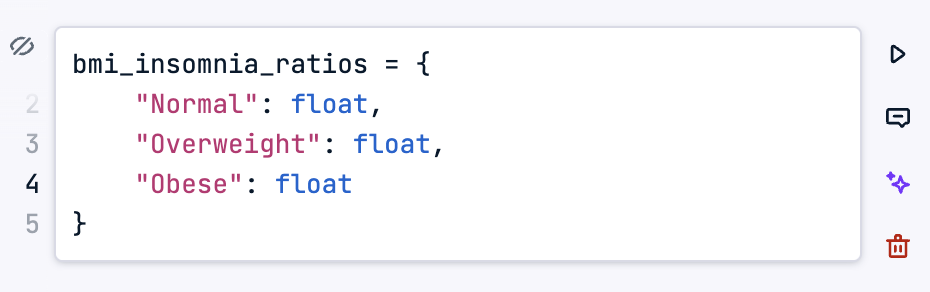

In [9]:
data['BMI Category'].replace({"Normal Weight":"Normal"},inplace = True)

/tmp/ipykernel_17/4113452669.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['BMI Category'].replace({"Normal Weight":"Normal"},inplace = True)


In [10]:
# Check the value frequency on BMI column
data['BMI Category'].value_counts(dropna = False)

BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

In [11]:
#Check the value frequency on Sleep Disorder column 
data['Sleep Disorder'].value_counts(normalize=True)

Sleep Disorder
Sleep Apnea    0.503226
Insomnia       0.496774
Name: proportion, dtype: float64

In [12]:
# Normal
# Filter the full dataframe to only rows where BMI Category is Normal and Sleep Disorder is Insomnia.
normal = data[(data['BMI Category']=="Normal") & (data["Sleep Disorder"]=="Insomnia")]

# Total normal rows 
total_normal_rows = len(data[data['BMI Category']=="Normal"])

# Calculate normal insomnia ratio  
normal_insomnia_ratio  = np.round(len(normal)/total_normal_rows ,2)

# Overweight
# Filter the full dataframe to only rows where BMI Category is Overweight and Sleep Disorder is Insomnia.
overweight = data[(data['BMI Category']=="Overweight") & (data["Sleep Disorder"]=="Insomnia")]

# Total overweight rows

total_overweight_rows =  len(data[data['BMI Category']=="Overweight"])


# Calculate overweight insomnia ratio
overweight_insomnia_ratio  = np.round(len(overweight)/total_overweight_rows,2)

 
# Obese
# Filter the full dataframe to only rows where BMI Category is Obese and Sleep Disorder is Insomnia.
obese = data[(data['BMI Category']=="Obese") & (data["Sleep Disorder"]=="Insomnia")]

# Total obese rows
total_obese_rows = len(data[data["BMI Category"]=="Obese"])
# Calculate obese insomnia ratio
obese_insomnia_ratio  = np.round(len(obese)/total_obese_rows,2)
# Create dictionary to store the ratios for each BMI category 
bmi_insomnia_ratios = {
                    "Normal":normal_insomnia_ratio,
                    "Overweight": overweight_insomnia_ratio ,
                    "Obese": obese_insomnia_ratio
}


In [13]:
print(bmi_insomnia_ratios)

{'Normal': 0.04, 'Overweight': 0.43, 'Obese': 0.4}



**Conclusion and Insights**

* Higher BMI = Higher Insomnia:


    *  Overweight (43%)and Obese (40%) users show high insomnia rates, unlike those with            Normal BMI (4%).
    *  Suggests excess weight may lead to sleep disturbances due to health factors (e.g.,           metabolic issues, sleep apnea).
    
* *Normal BMI Linked to Better Sleep:*
  
    *  Normal-weight individuals have significantly lower insomnia rates, indicating a              potential benefit of weight management for sleep quality.
      
**Recommendations**

* Focus on Overweight and Obese Users:

    * Offer wellness programs targeting nutrition, exercise, and stress reduction to help          mitigate insomnia.

**Educate on BMI-Sleep Connection:**

* Provide in-app tips on how weight management can improve sleep, including reminders          and sleep hygiene practices.